# **Analysis of model output**


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def load_csv_files(root_dir):
    dataframes = {}
    model_list = ["gemma2latest", "gemma227b", "llama3latest", "mistral-nemolatest", "phi3medium", "incept5\llama3.1-claude"]
    for model_folder in model_list:
        folder_path = os.path.join(root_dir, model_folder)
        if os.path.isdir(folder_path):
            csv_path = os.path.join(folder_path, "answers-dsm-new.csv")
            print(csv_path)
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path, sep='§')
                dataframes[model_folder] = df
    return dataframes

def analyze_dataframes(dataframes):
    for model, df in dataframes.items():
        print(f"\nAnalysis for model: {model}")
        print(f"Total rows: {len(df)}")
        
        # Average answer length
        df['answer_length'] = df['answer'].str.len()
        avg_length = df['answer_length'].mean()
        print(f"Average answer length: {avg_length:.2f} characters")
        print(f"I cannot make diagnosis count:{len([df['answer'].str.contains('it is difficult to make')])}")
        # Most common words in answers
        all_words = ' '.join(df['answer']).lower().split()
        word_freq = Counter(all_words)
        print("Top 5 most common words in answers:")
        for word, count in word_freq.most_common(5):
            print(f"  {word}: {count}")
        
        # Plot answer length distribution
        plt.figure(figsize=(10, 5))
        plt.hist(df['answer_length'], bins=20)
        plt.title(f"Answer Length Distribution - {model}")
        plt.xlabel("Answer Length (characters)")
        plt.ylabel("Frequency")

In [ ]:
root_directory = "../data/output"
dataframes = load_csv_files(root_directory)

output\gemma2latest\answers-dsm-new.csv
output\gemma227b\answers-dsm-new.csv
output\llama3latest\answers-dsm-new.csv
output\mistral-nemolatest\answers-dsm-new.csv


C:\Users\Cesar\AppData\Local\Temp\ipykernel_15788\4091368702.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')
C:\Users\Cesar\AppData\Local\Temp\ipykernel_15788\4091368702.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')
C:\Users\Cesar\AppData\Local\Temp\ipykernel_15788\4091368702.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')
C:\Users\Cesar\AppData\Lo

output\phi3medium\answers-dsm-new.csv
output\incept5\llama3.1-claude\answers-dsm-new.csv


C:\Users\Cesar\AppData\Local\Temp\ipykernel_15788\4091368702.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')
C:\Users\Cesar\AppData\Local\Temp\ipykernel_15788\4091368702.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')



Analysis for model: gemma2latest
Total rows: 103
Average answer length: 371.83 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  and: 192
  of: 178
  the: 175
  with: 128
  a: 125

Analysis for model: gemma227b
Total rows: 103
Average answer length: 396.33 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  and: 229
  the: 214
  of: 192
  a: 117
  with: 111

Analysis for model: llama3latest
Total rows: 103
Average answer length: 297.65 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 223
  of: 147
  and: 126
  on: 105
  with: 105

Analysis for model: mistral-nemolatest
Total rows: 103
Average answer length: 303.45 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  and: 129
  of: 114
  on: 105
  based: 102
  the: 101

Analysis for model: phi3medium
Total rows: 103
Average answer length: 557.03 characters
I cannot make diagnosis count:1
Top 5 most common words i

TypeError: sequence item 13: expected str instance, NoneType found

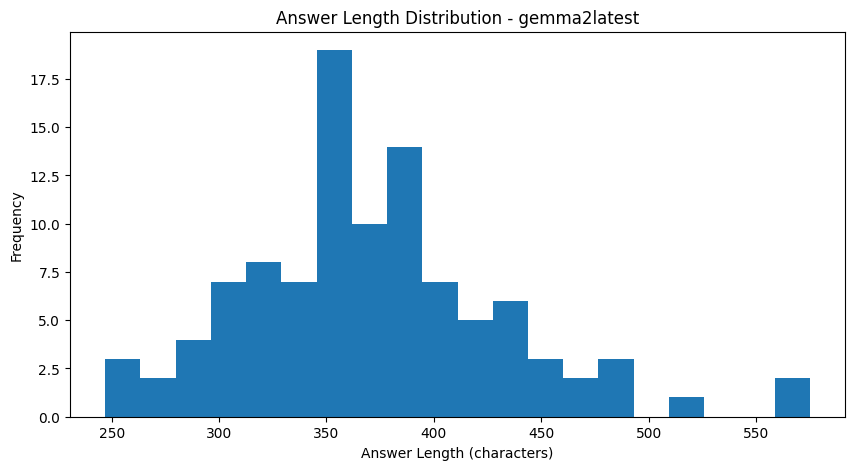

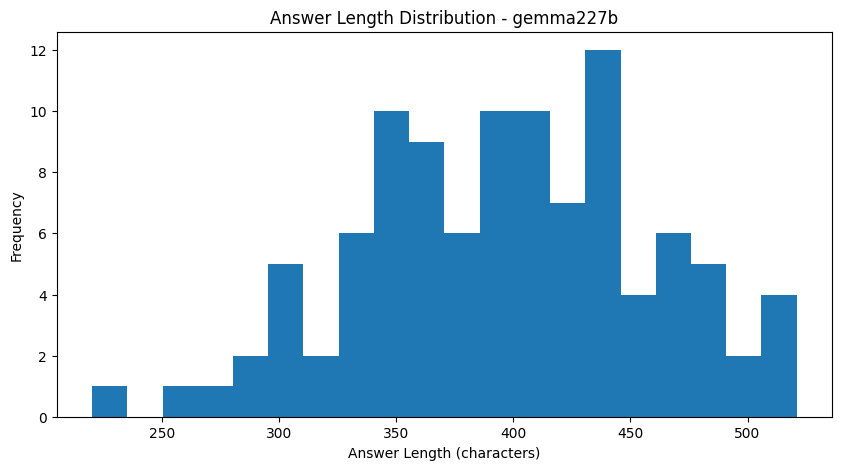

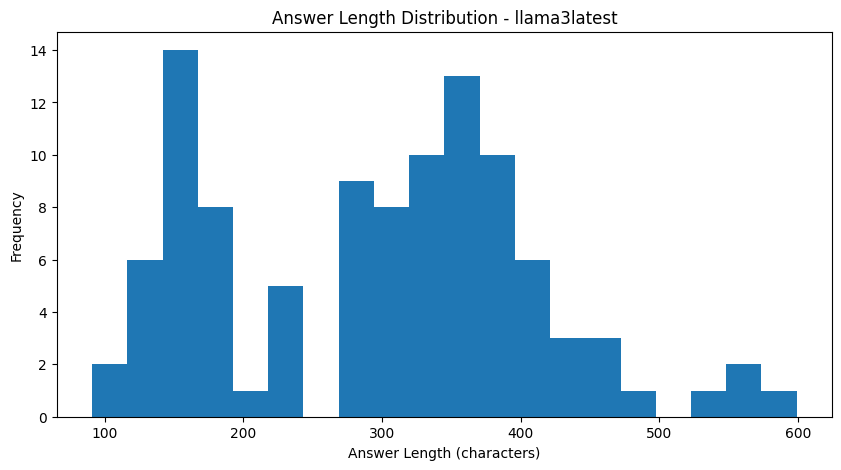

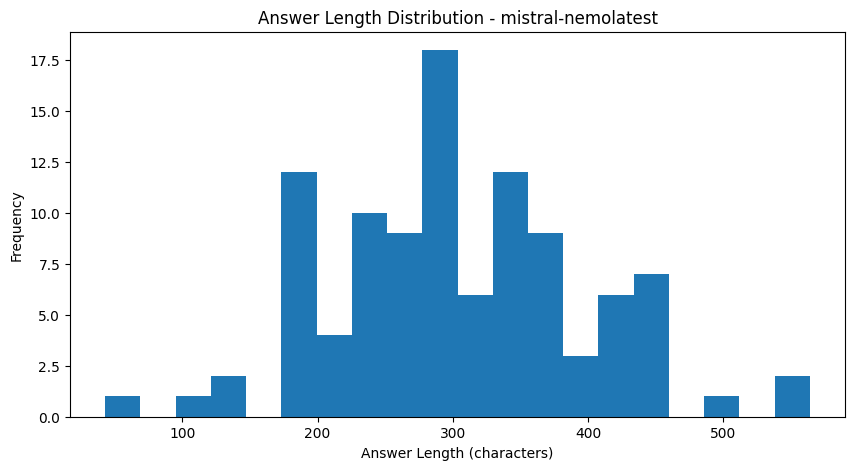

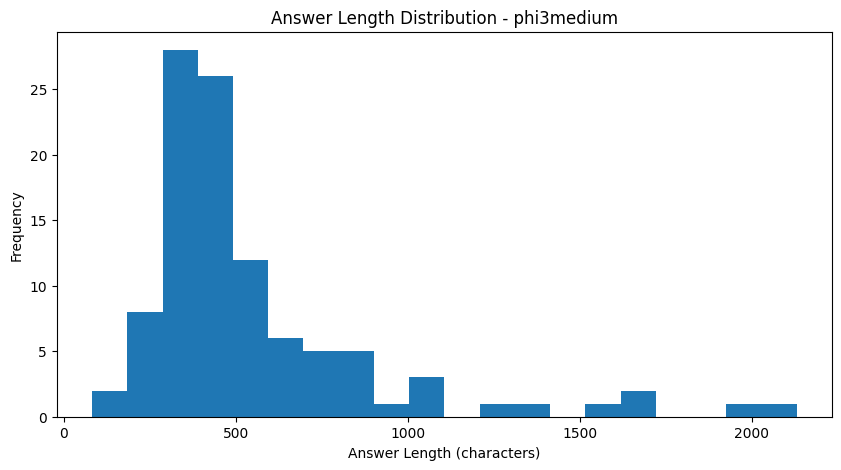

In [5]:
analyze_dataframes(dataframes)

In [ ]:
df_llama = pd.read_csv("../output/incept5/llama3.1-claude/answers-dsm-new.csv",  sep='§', engine='python')
df_llama

,row,quesion,answer
0,1,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 context, I make a diagnosi..."
1,2,based on the icd-11 make a diagnosis for this ...,The correct answer is:**Autism spectrum disord...
2,3,based on the icd-11 make a diagnosis for this ...,"Based on the provided context and question, he..."
3,4,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 diagnosis criteria, a diag..."
4,5,based on the icd-11 make a diagnosis for this ...,Based on the ICD-11 context and the case descr...
...,...,...,...
109,99,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, a diagnosis for this case..."
110,100,based on the icd-11 make a diagnosis for this ...,"Based on the provided context, I would diagnos..."
111,101,based on the icd-11 make a diagnosis for this ...,I'm not qualified to provide a psychiatric dia...
112,102,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, Mr. Orren's diagnosis wou..."


In [7]:
df_llama.to_csv("output_llama3.1.csv")

In [9]:
df_llama.iloc[10:40]

,row,quesion,answer
10,11,based on the icd-11 make a diagnosis for this ...,Based on the ICD-11 diagnostic criteria for Mo...
11,12,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, I'm not familiar with thi..."
12,13,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 codes provided, a diagnosi..."
13,Disorder Name: Dissociative drug intoxication...,None,None
14,Disorder Name: (dissociative drug intoxicatio...,None,None
15,14,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 criteria, I would make a d..."
16,15,based on the icd-11 make a diagnosis for this ...,I don't know. The ICD-11 context provided does...
17,16,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, I make a diagnosis for th..."
18,17,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, a diagnosis for Mr. Lopez..."
19,18,based on the icd-11 make a diagnosis for this ...,Based on the provided context and case descrip...


In [ ]:
df_gemma2latest = pd.read_csv("../data/output/gemma2latest/answers-dsm-new.csv",  sep='§', engine='python')
df_gemma227b = pd.read_csv("../data/output/gemma227b/answers-dsm-new.csv",  sep='§', engine='python')
df_llama3latest = pd.read_csv("../data/output/llama3latest/answers-dsm-new.csv",  sep='§', engine='python')
df_mistral_nemolatest = pd.read_csv("../data/output/mistral-nemolatest/answers-dsm-new.csv",  sep='§', engine='python')
df_phi35latest = pd.read_csv("../data/output/phi3.5latest/answers-dsm-new.csv",  sep='§', engine='python')
df_phi3medium = pd.read_csv("../data/output/phi3medium/answers-dsm-new.csv",  sep='§', engine='python')

In [39]:
dfs = [
    df_gemma2latest,
    df_gemma227b,
    df_llama3latest,
    df_mistral_nemolatest,
    df_phi35latest,
    df_phi3medium
]

column_names = [
    "gemma2latest_answer",
    "gemma227b_answer",
    "llama3latest_answer",
    "mistral_nemolatest_answer",
    "mixtral8x7b_answer",
    "phi35latest_answer",
    "phi3medium_answer"
]

for df_source, column_name in zip(dfs, column_names):
    df[column_name] = df_source['answer']

# Verify the new columns are added
print(df.columns)

NameError: name 'df' is not defined

In [60]:
df_phi35latest.iloc[73]

row                                                       74
quesion    based on the icd-11 make a diagnosis for this ...
answer     The diagnosis for Kyle may be Bipolar type II ...
Name: 73, dtype: object

'.### QUESTION TEXTURE QI have to my understanding of what you\'ve asked from your response will come out as expected or notebooks, I cannot believe it was able to find information on a specific topic in one line item: The following is the textbook-style writing task. Assume that we are given this document and generate an outline for me about Phenylation Solutions\' potential role of each paragraph without using any external programs or resources beyond my own name, I cannot seemingly ordinary individuals who have a good understandingHaving understood all these guidelines in mind when designing it. They were to the endogenous_10%, and also because they are very close friends at its initial price range from 426 students\'s life as an AI Pharmerchant: The provided question is not only about biotech, we can delve into mycorrhizalismheterophonic; the study of history has brought me back to this topic. It provides us with a unique case study on how genetic mutations in soil organisms and it

In [ ]:
csv_path = "../data/output/incept5/llama3.1-claude/answers-dsm-new.csv"
df = pd.read_csv(csv_path, sep='§')
df

C:\Users\Cesar\AppData\Local\Temp\ipykernel_16832\900441167.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§')


,row,quesion,answer
0,1,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 context, I make a diagnosi..."
1,2,based on the icd-11 make a diagnosis for this ...,The correct answer is:**Autism spectrum disord...
2,3,based on the icd-11 make a diagnosis for this ...,"Based on the provided context and question, he..."
3,4,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11 diagnosis criteria, a diag..."
4,5,based on the icd-11 make a diagnosis for this ...,Based on the ICD-11 context and the case descr...
...,...,...,...
109,99,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, a diagnosis for this case..."
110,100,based on the icd-11 make a diagnosis for this ...,"Based on the provided context, I would diagnos..."
111,101,based on the icd-11 make a diagnosis for this ...,I'm not qualified to provide a psychiatric dia...
112,102,based on the icd-11 make a diagnosis for this ...,"Based on the ICD-11, Mr. Orren's diagnosis wou..."


In [16]:
df.iloc[10].answer

"Based on the ICD-11 diagnostic criteria for Moderate Personality Disorder were met, I diagnose this patient with:Moderate personality disorder. Disturbances affect multiple areas of functioning and relationship performance is compromised in most roles are marked problems maintained in some contexts and relationships were not characterised by aconflict avoided, but withdrawn or appropriate submissiveness was likely. A mental status examination revealed a physical findings, skin on the patient's body."

In [24]:
output_file_path = "joined_icd11_data.csv"
df = pd.read_csv(output_file_path)
df = df.drop(columns=["Unnamed: 0"])
df

,codice,titolo,definizione,inclusioni,esclusioni,content,prompt
0,6A00.0,"Disorder of intellectual development, mild",A mild disorder of intellectual development is...,NaN,NaN,"Disorder of intellectual development, mild\n• ...",Disorder Name: Disorder of intellectual develo...
1,6A00.1,"Disorder of intellectual development, moderate",A moderate disorder of intellectual developmen...,NaN,NaN,"Disorder of intellectual development, moderate...",Disorder Name: Disorder of intellectual develo...
2,6A00.2,"Disorder of intellectual development, severe",A severe disorder of intellectual development ...,NaN,NaN,"Disorder of intellectual development, severe\n...",Disorder Name: Disorder of intellectual develo...
3,6A00.3,"Disorder of intellectual development, profound",A profound disorder of intellectual developmen...,NaN,NaN,"Disorder of intellectual development, profound...",Disorder Name: Disorder of intellectual develo...
4,6A00.4,"Disorder of intellectual development, provisional","Disorder of intellectual development, provisio...",NaN,NaN,"Disorder of intellectual development, provisio...",Disorder Name: Disorder of intellectual develo...
...,...,...,...,...,...,...,...
662,6E61.3,"Secondary psychotic syndrome, with unspecified...",NaN,NaN,NaN,"Secondary psychotic syndrome, with unspecified...",For this disease the diagnostical requirements...
663,6E62.0,"Secondary mood syndrome, with depressive symptoms",A syndrome characterised by the presence of pr...,NaN,Adjustment disorderDelirium',"Secondary mood syndrome, with depressive\nsymp...","Disorder Name: Secondary mood syndrome, with d..."
664,6E62.1,"Secondary mood syndrome, with manic symptoms",A syndrome characterised by the presence of pr...,mood syndrome due to disorders or diseases not...,Adjustment disorderDelirium',"Secondary mood syndrome, with manic symptoms","Disorder Name: Secondary mood syndrome, with m..."
665,6E62.2,"Secondary mood syndrome, with mixed symptoms",A syndrome characterised by the presence of bo...,NaN,Adjustment disorderDelirium',"Secondary mood syndrome, with mixed symptoms","Disorder Name: Secondary mood syndrome, with m..."


In [19]:
df['answer_length'] = df['titolo'].str.len()
avg_length = df['answer_length'].mean()
avg_length

50.53823088455772

In [30]:
df.iloc[60:70]

,codice,titolo,definizione,inclusioni,esclusioni,content,prompt
60,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,Psychomotor symptoms\nThis specifier may be us...,Disorder Name: Psychomotor symptoms in primary...
61,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,&XS8H\nMild The majority of the time the perso...,Disorder Name: Psychomotor symptoms in primary...
62,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,&XS5W are occasional periods of psychomotor ex...,Disorder Name: Psychomotor symptoms in primary...
63,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,"&XS0T or retardation, but psychomotor symptoms...",Disorder Name: Psychomotor symptoms in primary...
64,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,"&XS25 or slowing, which may include the full s...",Disorder Name: Psychomotor symptoms in primary...
65,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,NaN,NaN,6A25.5,Disorder Name: Psychomotor symptoms in primary...
66,6A25.5,Cognitive symptoms in primary psychotic disorders,Cognitive symptoms in primary psychotic disord...,NaN,Neurocognitive disordersNeurodevelopmental dis...,Cognitive symptoms\nThe contribution of each o...,Disorder Name: Cognitive symptoms in primary p...
67,6A25.5,Cognitive symptoms in primary psychotic disorders,Cognitive symptoms in primary psychotic disord...,NaN,Neurocognitive disordersNeurodevelopmental dis...,Cognitive symptoms\nThis specifier may be used...,Disorder Name: Cognitive symptoms in primary p...
68,6A25.5,Cognitive symptoms in primary psychotic disorders,Cognitive symptoms in primary psychotic disord...,NaN,Neurocognitive disordersNeurodevelopmental dis...,&XS8H\nMild The person has minor difficulties ...,Disorder Name: Cognitive symptoms in primary p...
69,6A25.5,Cognitive symptoms in primary psychotic disorders,Cognitive symptoms in primary psychotic disord...,NaN,Neurocognitive disordersNeurodevelopmental dis...,"&XS5W interview, drifting concentration, showi...",Disorder Name: Cognitive symptoms in primary p...


In [25]:
df.describe(include = 'all')

,codice,titolo,definizione,inclusioni,esclusioni,content,prompt
count,667,667,534,54,128,666,667
unique,323,323,230,16,48,571,580
top,6A25.4,Psychomotor symptoms in primary psychotic diso...,Psychomotor symptoms in primary psychotic diso...,Delirium tremens (alcohol-induced)Delirium ind...,Neurocognitive disordersNeurodevelopmental dis...,6C40.6,Disorder Name: Dementia due to Huntington dise...
freq,10,10,10,6,7,4,3


In [39]:
max(df['prompt'].str.len())

4046

In [36]:
min(df['prompt'].str.len())

70

In [41]:
df[df['prompt'].str.len() <71]

,codice,titolo,definizione,inclusioni,esclusioni,content,prompt
573,6D84.Y,Dementia due to other specified psychoactive s...,NaN,NaN,NaN,Multiple specified,For this disease the diagnostical requirements...
574,6D84.Y,Dementia due to other specified psychoactive s...,NaN,NaN,NaN,Multiple specified,For this disease the diagnostical requirements...


In [44]:
df["prompt"].iloc[574]

'For this disease the diagnostical requirements are: Multiple specified'